In [1]:
import numpy as np
from numpy import pi as π
sech = lambda x: 1 / np.cosh(x)

# http://tensorly.org for tensor factorization (conda or pip)
from tensorly.decomposition import parafac

import matplotlib.pyplot as plt
from matplotlib import animation, rc
plt.rcParams['font.size'] =  18
plt.rcParams['animation.html'] = 'jshtml'

from IPython.display import HTML, display

Using numpy backend.


In [2]:
step = 0.1
x = np.arange(-5, 5 + step, step)
y = np.arange(-6, 6 + step, step)
t = np.arange(0, 10*π + step, step)

X, Y, T = np.meshgrid(x, y, t)
A = (
    np.exp(-(X**2 + 0.5 * Y**2)) * np.cos(2 * T) + 
    sech(X) * np.tanh(X) * np.exp(-0.2 * Y**2) * np.sin(T)
)

In [3]:
def animate(it, pcm, txt, A):
    # strange array size issue here seems to be fixed in mpl3.3
    pcm.set_array(A[:, :, it].ravel())
    txt.set_text(f't={T[0, 0, it]:0.1f}')

fig, ax = plt.subplots(figsize=(8, 8))
pcm = ax.pcolormesh(
    X[:, :, 0],
    Y[:, :, 0],
    A[:, :, 0],
    vmin=-1, vmax=1, shading='auto'
)
txt = ax.text(-4.5, -5.5, f't={0:0.1f}')
ax.axis(False)

anim = animation.FuncAnimation(
    fig, animate, fargs=(pcm, txt, A),
    frames=len(t), interval=50, blit=False, repeat=False
)
display(HTML(anim.to_jshtml()))
plt.close(fig);

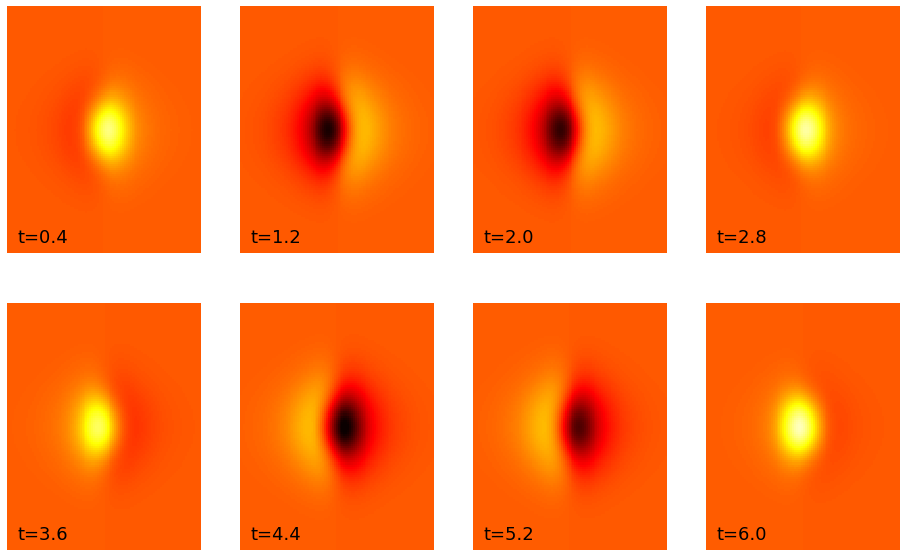

In [4]:
# Figure 1.30

fig, axs = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axs.flat):
    j = 8*i + 4
    ax.pcolormesh(
        X[:, :, 0],
        Y[:, :, 0],
        A[:, :, j],
        vmin=-1, vmax=1,
        shading='auto',
        cmap='hot'
    )
    ax.text(-4.5, -5.5, f't={T[0, 0, j]:0.1f}')
    ax.axis(False)

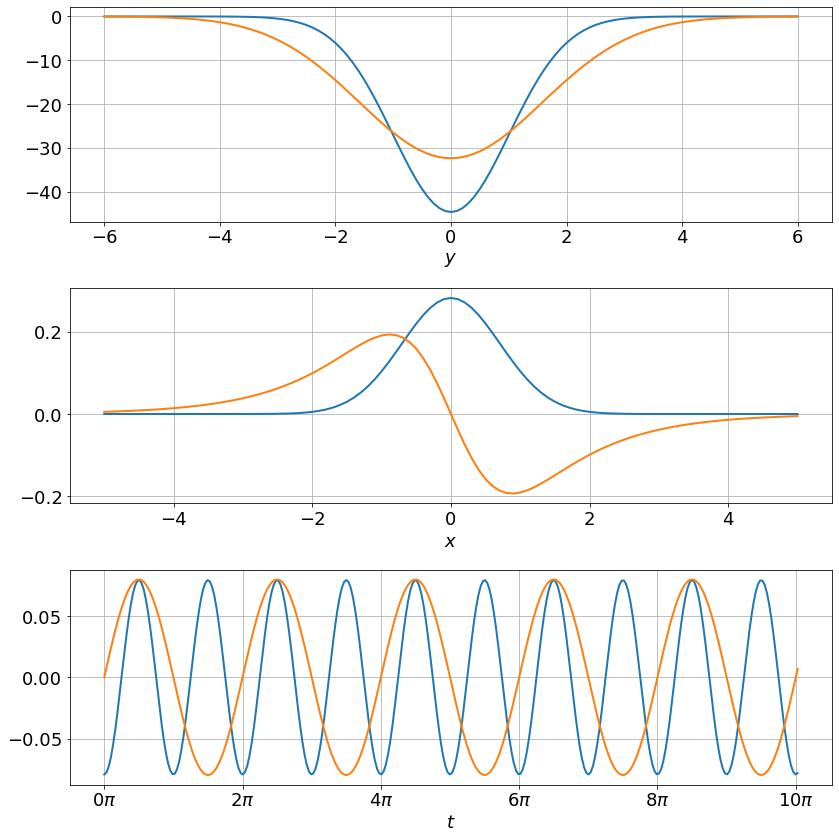

In [5]:
# Figure 1.31

A1, A2, A3 = parafac(A, 2)

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for ax, x_ax, y_ax, xlabel in zip(axs, [y, x, t/π], [A1, A2, A3], ['$y$', '$x$', '$t$']):
    ax.plot(x_ax, y_ax, linewidth=2)
    ax.grid(True)
    ax.set_xlabel(xlabel)
    if xlabel == '$t$':
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%g$\pi$'))
fig.tight_layout()